In [3]:
library(edgeR)
library(ggplot2)
library(ggrepel)
library(EnsDb.Hsapiens.v75)
library(stringr)
library(ComplexHeatmap)
#library(clusterProfiler)
library(circlize)
library(ggrepel)
library(patchwork)
library(org.Hs.eg.db)
library(viridis)
library(reshape2)
library(RColorBrewer)
library(readxl)
#library(umap)

In [4]:
count_data = read.table("../data/k562_sggata1_raw_counts.tsv", skip = 1, header = TRUE, row.names=1)
count_data = count_data[,6:dim(count_data)[2]]
head(count_data)

,results.star.BD300.1_NTC_DMSO_rep1_Aligned.sortedByCoord.out.bam,results.star.BD300.2_NTC_DMSO_rep2_Aligned.sortedByCoord.out.bam,results.star.BD300.3_NTC_DMSO_rep3_Aligned.sortedByCoord.out.bam,results.star.BD300.4_NTC_BRQ_rep1_Aligned.sortedByCoord.out.bam,results.star.BD300.5_NTC_BRQ_rep2_Aligned.sortedByCoord.out.bam,results.star.BD300.6_NTC_BRQ_rep3_Aligned.sortedByCoord.out.bam,results.star.BD300.7_GATA1_DMSO_rep1_Aligned.sortedByCoord.out.bam,results.star.BD300.8_GATA1_DMSO_rep2_Aligned.sortedByCoord.out.bam,results.star.BD300.9_GATA1_DMSO_rep3_Aligned.sortedByCoord.out.bam,results.star.BD300.10_GATA1_BRQ_rep1_Aligned.sortedByCoord.out.bam,⋯,results.star.BD300.15_PTPN1_DMSO_rep3_Aligned.sortedByCoord.out.bam,results.star.BD300.16_PTPN1_BRQ_rep1_Aligned.sortedByCoord.out.bam,results.star.BD300.17_PTPN1_BRQ_rep2_Aligned.sortedByCoord.out.bam,results.star.BD300.18_PTPN1_BRQ_rep3_Aligned.sortedByCoord.out.bam,results.star.BD300.19_MAX_DMSO_rep1_Aligned.sortedByCoord.out.bam,results.star.BD300.20_MAX_DMSO_rep2_Aligned.sortedByCoord.out.bam,results.star.BD300.21_MAX_DMSO_rep3_Aligned.sortedByCoord.out.bam,results.star.BD300.22_MAX_BRQ_rep1_Aligned.sortedByCoord.out.bam,results.star.BD300.23_MAX_BRQ_rep2_Aligned.sortedByCoord.out.bam,results.star.BD300.24_MAX_BRQ_rep3_Aligned.sortedByCoord.out.bam
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000223972.5,1,3.0,1,1,0,1,0,1,0,0,⋯,0,1,0,2,0,3,0,1.5,2,1.5
ENSG00000227232.5,1,7.0,4,6,0,2,0,1,2,0,⋯,0,0,3,2,4,0,0,1.5,4,2.5
ENSG00000278267.1,0,0.0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0.0,0,0.0
ENSG00000243485.5,4,2.5,2,6,0,1,1,0,0,0,⋯,1,0,0,0,0,6,0,4.0,5,0.0
ENSG00000284332.1,0,0.5,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0.0,0,0.0
ENSG00000237613.2,0,0.0,2,1,0,1,0,0,0,0,⋯,0,0,0,0,1,0,0,0.0,0,2.0


In [5]:
# change colnames and rownames
colnames(count_data) = gsub("results.star.BD300.", "", gsub("_Aligned.sortedByCoord.out.bam", "", colnames(count_data)))

potential_rownames = as.character(sapply(rownames(count_data), function(x) strsplit(x, '[.]')[[1]][1]))
count_data = count_data[!(duplicated(potential_rownames)),]
rownames(count_data) = potential_rownames[!(duplicated(potential_rownames))]                           
annotations_orgDb <- AnnotationDbi::select(EnsDb.Hsapiens.v75, # database
                                     keys = rownames(count_data) ,  # data to use for retrieval
                                     columns = c("SYMBOL"), # information to retreive for given data
                                     keytype = "GENEID") # type of data given in 'keys' argument
annotations_orgDb = annotations_orgDb[!duplicated(annotations_orgDb$SYMBOL),]

count_data = count_data[annotations_orgDb$GENEID,]  # you lose a few genes here but not many
rownames(count_data) = annotations_orgDb$SYMBOL
     
head(count_data)

,1_NTC_DMSO_rep1,2_NTC_DMSO_rep2,3_NTC_DMSO_rep3,4_NTC_BRQ_rep1,5_NTC_BRQ_rep2,6_NTC_BRQ_rep3,7_GATA1_DMSO_rep1,8_GATA1_DMSO_rep2,9_GATA1_DMSO_rep3,10_GATA1_BRQ_rep1,⋯,15_PTPN1_DMSO_rep3,16_PTPN1_BRQ_rep1,17_PTPN1_BRQ_rep2,18_PTPN1_BRQ_rep3,19_MAX_DMSO_rep1,20_MAX_DMSO_rep2,21_MAX_DMSO_rep3,22_MAX_BRQ_rep1,23_MAX_BRQ_rep2,24_MAX_BRQ_rep3
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
DDX11L1,1,3.0,1,1,0,1,0,1,0,0,⋯,0,1,0,2,0,3,0,1.5,2,1.5
WASH7P,1,7.0,4,6,0,2,0,1,2,0,⋯,0,0,3,2,4,0,0,1.5,4,2.5
MIR1302-10,4,2.5,2,6,0,1,1,0,0,0,⋯,1,0,0,0,0,6,0,4.0,5,0.0
FAM138A,0,0.0,2,1,0,1,0,0,0,0,⋯,0,0,0,0,1,0,0,0.0,0,2.0
OR4G4P,4,3.0,0,8,12,11,0,1,0,1,⋯,0,3,1,6,4,1,0,6.0,4,2.0
OR4G11P,0,1.0,2,4,2,3,0,0,0,1,⋯,0,0,1,0,2,0,0,0.0,0,0.0


In [7]:
samples = read.csv("../data/bd300_k562_kd_sample_sheet.csv")
samples[samples$perturbation == "sgGATA1-1",]$perturbation = "sgGATA1"
correct_names = colnames(count_data)
z = count_data[,19]
count_data[,19] = count_data[,24]
count_data[,24] = z
colnames(count_data) = correct_names

In [8]:
samples$pert_drug = paste(samples$perturbation, samples$drug, sep='_')
samples

name,cell_line,perturbation,drug,time,replicate,filename,pert_drug
<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
BD300-1_NTC_DMSO_rep1,K562_i4,sgNTC1,DMSO,72,1,220203Van_D22-120019_NA_sequence.fastq.gz,sgNTC1_DMSO
BD300-2_NTC_DMSO_rep2,K562_i4,sgNTC1,DMSO,72,2,220203Van_D22-120020_NA_sequence.fastq.gz,sgNTC1_DMSO
BD300-3_NTC_DMSO_rep3,K562_i4,sgNTC1,DMSO,72,3,220203Van_D22-120021_NA_sequence.fastq.gz,sgNTC1_DMSO
BD300-4_NTC_BRQ_rep1,K562_i4,sgNTC1,BRQ,72,1,220203Van_D22-120022_NA_sequence.fastq.gz,sgNTC1_BRQ
BD300-5_NTC_BRQ_rep2,K562_i4,sgNTC1,BRQ,72,2,220203Van_D22-120023_NA_sequence.fastq.gz,sgNTC1_BRQ
BD300-6_NTC_BRQ_rep3,K562_i4,sgNTC1,BRQ,72,3,220203Van_D22-120024_NA_sequence.fastq.gz,sgNTC1_BRQ
BD300-7_GATA1_DMSO_rep1,K562_i4,sgGATA1,DMSO,72,1,220203Van_D22-120025_NA_sequence.fastq.gz,sgGATA1_DMSO
BD300-8_GATA1_DMSO_rep2,K562_i4,sgGATA1,DMSO,72,2,220203Van_D22-120026_NA_sequence.fastq.gz,sgGATA1_DMSO
BD300-9_GATA1_DMSO_rep3,K562_i4,sgGATA1,DMSO,72,3,220203Van_D22-120027_NA_sequence.fastq.gz,sgGATA1_DMSO


In [9]:
d0 <- DGEList(count_data)
d0 <- calcNormFactors(d0)
cutoff <- 5
drop <- which(apply(cpm(d0), 1, max) < cutoff)
d <- d0[-drop,] 
dim(d) # number of genes left

[1] 11928    24

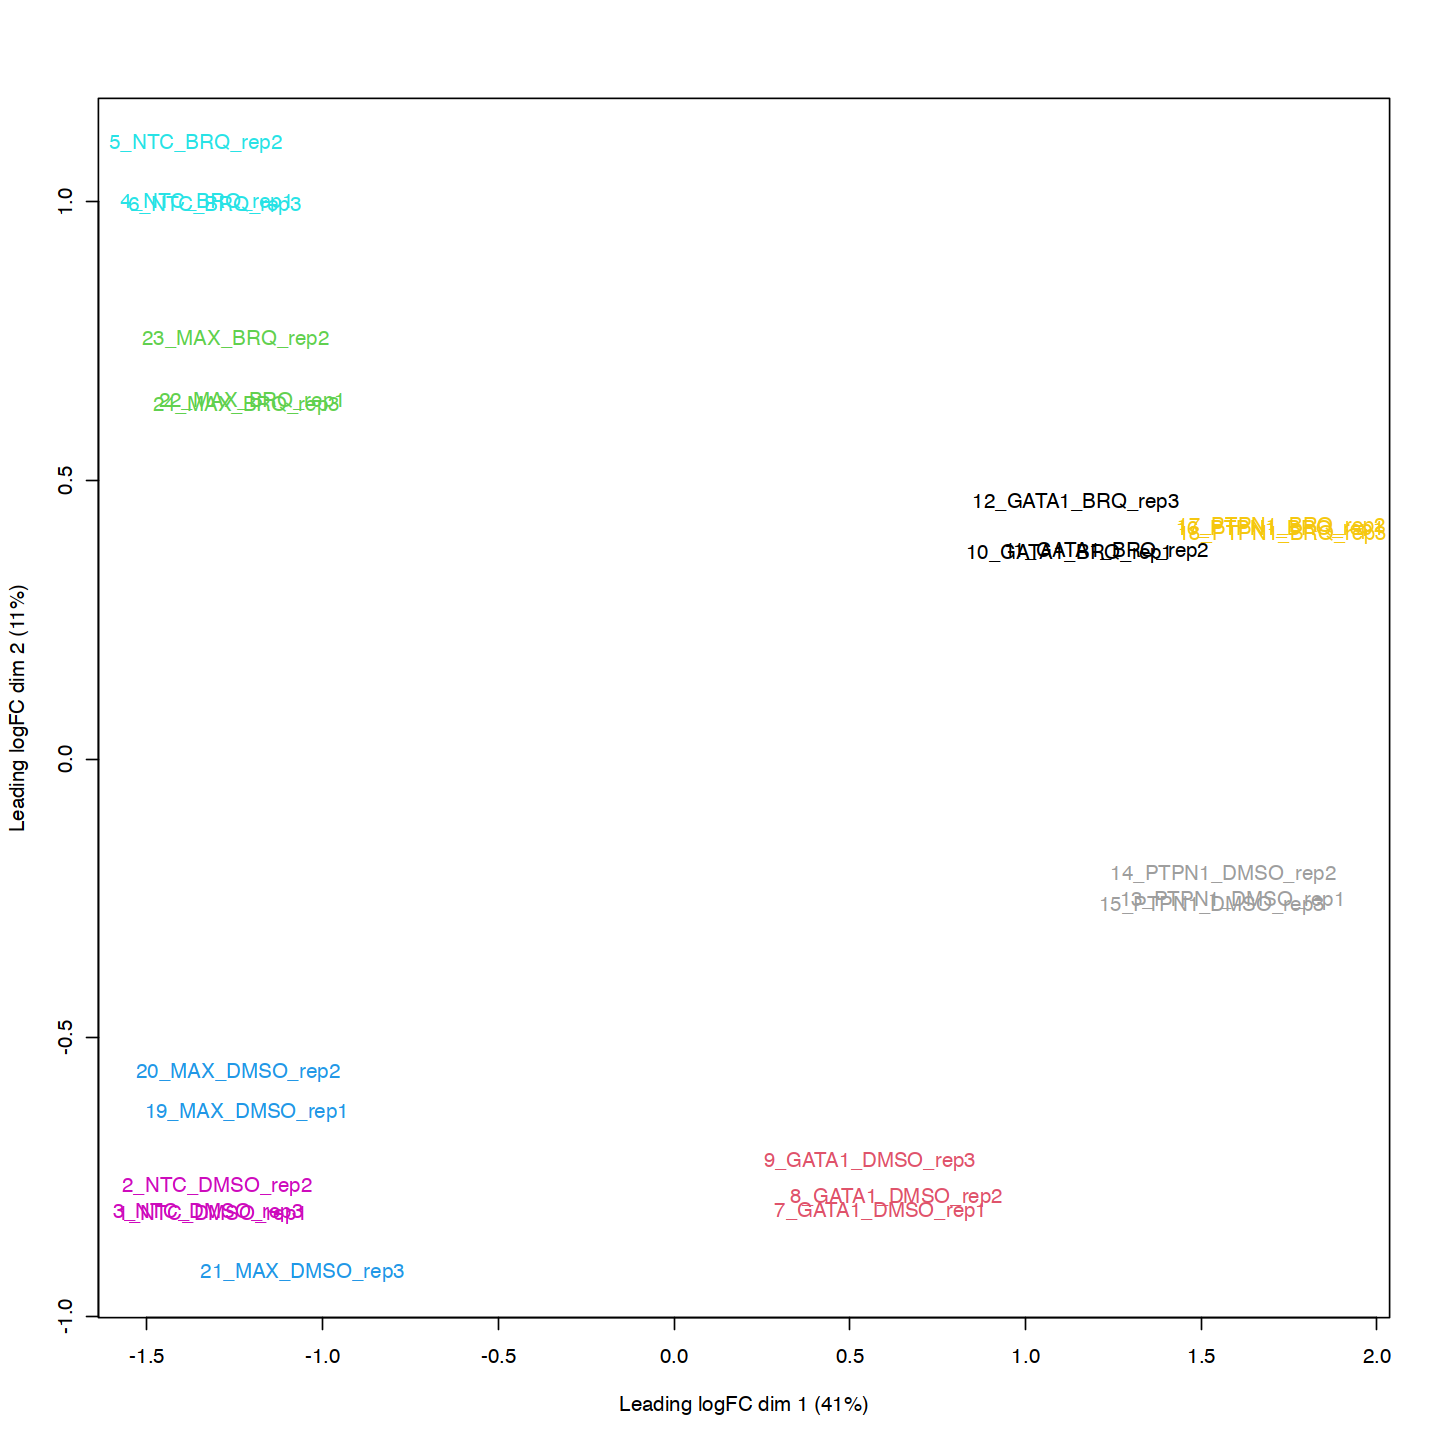

In [10]:
options(repr.plot.width=12, repr.plot.height=12)
conds = samples$pert_drug

plotMDS(d, col = as.numeric(as.factor(conds)))

,condssgGATA1_BRQ,condssgGATA1_DMSO,condssgMAX_BRQ,condssgMAX_DMSO,condssgNTC1_BRQ,condssgNTC1_DMSO,condssgPTPN1_BRQ,condssgPTPN1_DMSO
RP11-34P13.7,2.028606,1.281319,2.805067,1.438539,2.736869,0.8275872,1.879871,-0.2846023
AP006222.2,4.251186,3.426963,5.262182,3.868703,5.617263,4.0323004,2.848700,2.8929184
RP5-857K21.4,6.054370,5.830312,5.424351,5.827058,4.890010,5.1746982,5.768317,5.8647894
MTND1P23,7.857112,8.079801,8.448230,8.535731,7.749650,7.9071732,7.434807,7.8350450
MTND2P28,7.394025,7.429162,7.054811,7.719991,6.684655,7.0597358,6.796383,7.2158636
hsa-mir-6723,13.357894,13.431812,13.857002,13.219616,13.025773,12.9503931,13.254583,12.5034591


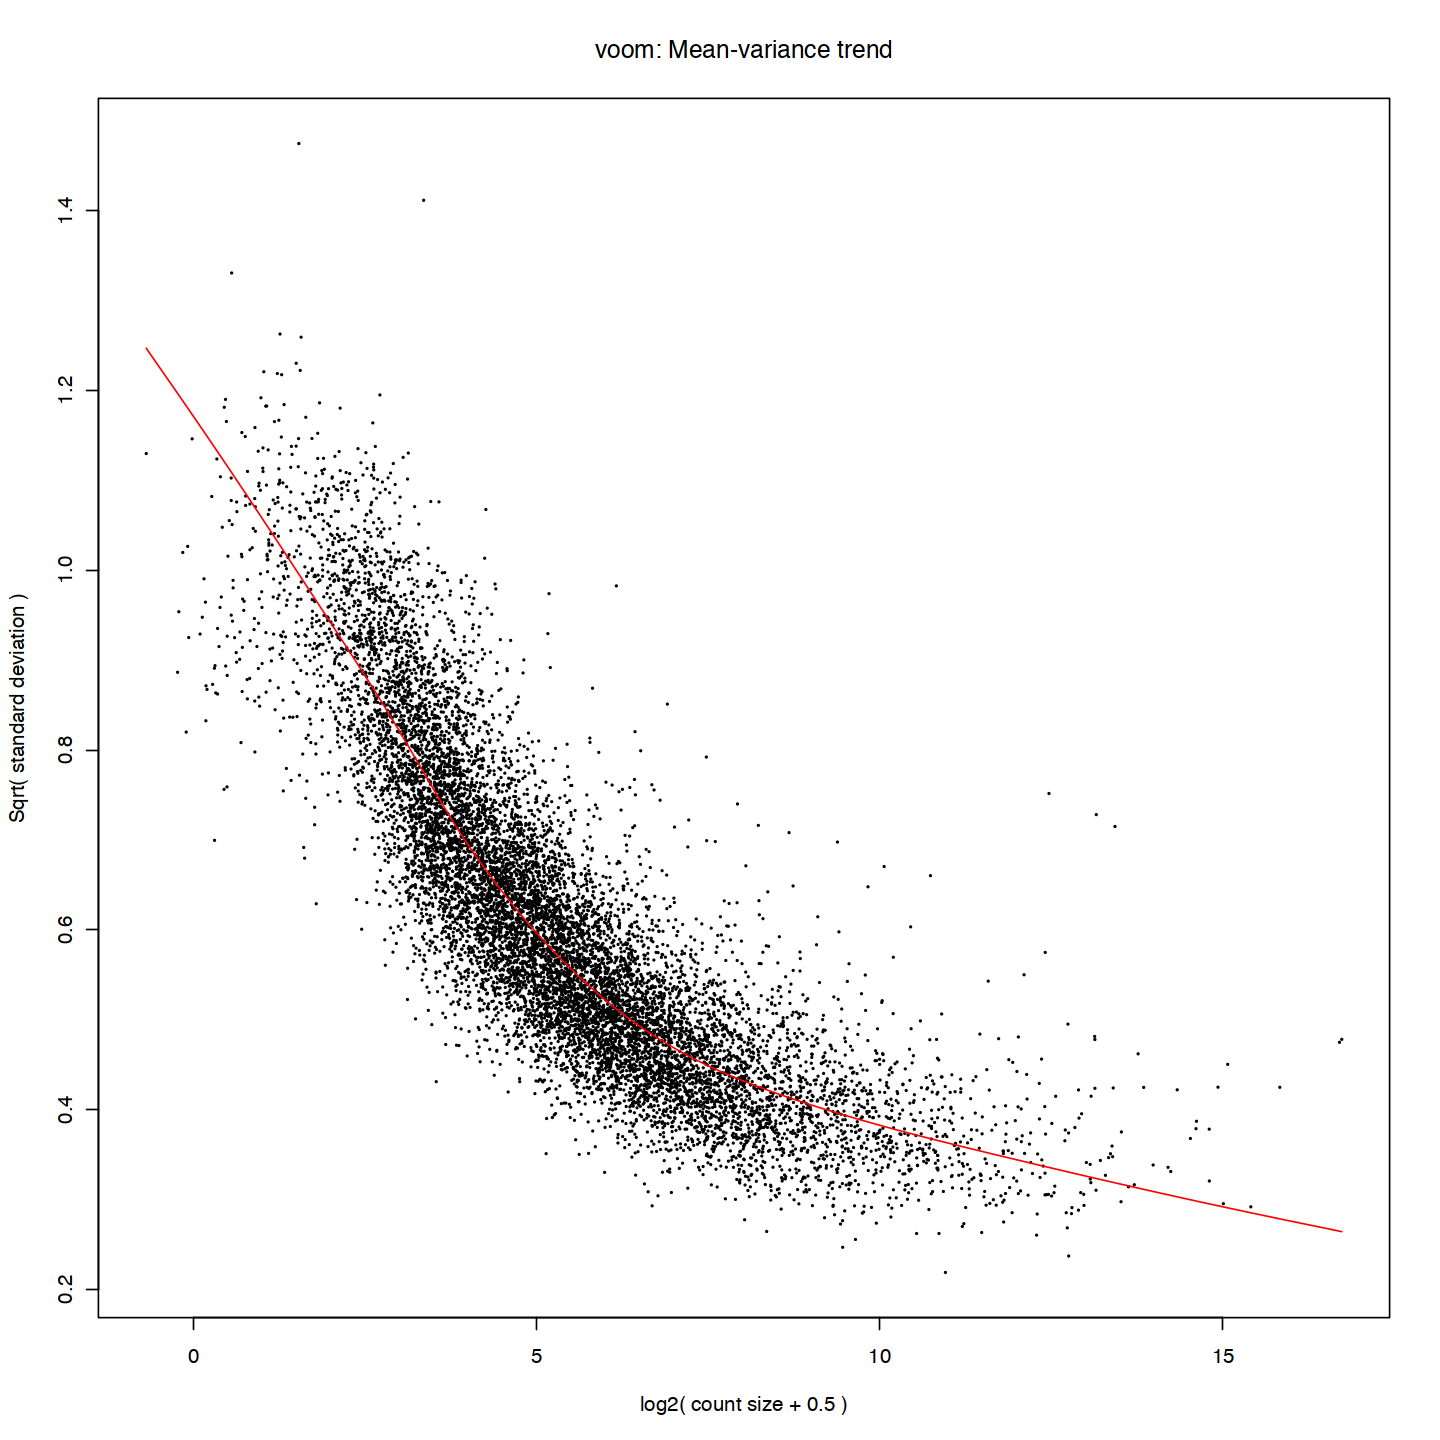

In [11]:
mm <- model.matrix(~0 + conds)
y <- voom(d, mm, plot = T)
fit <- lmFit(y, mm)
head(coef(fit))


In [12]:
norm_data = y$E
#write.csv(norm_data, "220215_BD300_K562_norm_expr.csv", quote=F)

In [13]:
ery_genes = c("HBG1", "HBG2", "HBZ", "GYPA", "GYPB", "GYPC", "ERMAP", "ALAS2", "HBA1", "HBA2", "HBB", "KLF1", "SLC25A37")
gran_genes = c("CSF3R", "LST1", "CD33", "ITGAM", "ITGAX", "FCGR1B", "PTPRC", "CD55", "CD24")

In [14]:
ery_norm = norm_data[ery_genes,]
m = apply(ery_norm, 1, mean)
s = apply(ery_norm, 1, sd)
ery_norm = sweep(ery_norm, 1, m, `-`)
ery_norm = sweep(ery_norm, 1, s, `/`)
ery_score = apply(ery_norm, 2, sum)
ery_score

1_NTC_DMSO_rep1    2_NTC_DMSO_rep2    3_NTC_DMSO_rep3     4_NTC_BRQ_rep1 
         -4.381400          -3.184687          -2.649651          14.615812 
    5_NTC_BRQ_rep2     6_NTC_BRQ_rep3  7_GATA1_DMSO_rep1  8_GATA1_DMSO_rep2 
         13.518400          13.841393          -7.786279          -7.067466 
 9_GATA1_DMSO_rep3  10_GATA1_BRQ_rep1  11_GATA1_BRQ_rep2  12_GATA1_BRQ_rep3 
         -7.480573          -2.345073          -4.182660          -1.936798 
13_PTPN1_DMSO_rep1 14_PTPN1_DMSO_rep2 15_PTPN1_DMSO_rep3  16_PTPN1_BRQ_rep1 
        -15.033169         -13.727782         -14.545092         -14.184442 
 17_PTPN1_BRQ_rep2  18_PTPN1_BRQ_rep3   19_MAX_DMSO_rep1   20_MAX_DMSO_rep2 
        -13.948895         -14.882724          10.267722          11.460435 
  21_MAX_DMSO_rep3    22_MAX_BRQ_rep1    23_MAX_BRQ_rep2    24_MAX_BRQ_rep3 
          9.178709          18.074234          18.347548          18.032438

In [15]:
gran_norm = norm_data[gran_genes,]
m = apply(gran_norm, 1, mean)
s = apply(gran_norm, 1, sd)
gran_norm = sweep(gran_norm, 1, m, `-`)
gran_norm = sweep(gran_norm, 1, s, `/`)
gran_score = apply(gran_norm, 2, sum)
gran_score

1_NTC_DMSO_rep1    2_NTC_DMSO_rep2    3_NTC_DMSO_rep3     4_NTC_BRQ_rep1 
         -3.344036          -3.515634          -2.471554          -7.651833 
    5_NTC_BRQ_rep2     6_NTC_BRQ_rep3  7_GATA1_DMSO_rep1  8_GATA1_DMSO_rep2 
         -3.184490          -3.707245           5.819996           5.192881 
 9_GATA1_DMSO_rep3  10_GATA1_BRQ_rep1  11_GATA1_BRQ_rep2  12_GATA1_BRQ_rep3 
          5.610490           4.023023           2.645637           5.550893 
13_PTPN1_DMSO_rep1 14_PTPN1_DMSO_rep2 15_PTPN1_DMSO_rep3  16_PTPN1_BRQ_rep1 
          9.352639           9.862013           7.605506           4.895317 
 17_PTPN1_BRQ_rep2  18_PTPN1_BRQ_rep3   19_MAX_DMSO_rep1   20_MAX_DMSO_rep2 
          6.946341           7.761842          -7.631442          -9.405493 
  21_MAX_DMSO_rep3    22_MAX_BRQ_rep1    23_MAX_BRQ_rep2    24_MAX_BRQ_rep3 
        -10.135347          -9.526290          -8.335058          -6.358158

In [16]:
process_res = function(res, fit) {
    tmp <- contrasts.fit(fit, res)
    tmp <- eBayes(tmp)
    res <- topTable(tmp, sort.by = "P", n = Inf)
    
    res["gene"] = rownames(res)
    res["nlogpval"] = -log10(res$adj.P.Val)
    res["label"] = ""
    res_up = res[res$logFC > 0,]
    res_up[order(-res_up$t),][1:100,]$label = res_up[order(-res_up$t),][1:100,]$gene
    res_down = res[res$logFC < 0,]
    res_down[order(res_down$t),][1:100,]$label = res_down[order(res_down$t),][1:100,]$gene
    res = rbind(res_up, res_down)
    res = res[order(-res$t),]
    return(res)
}

In [17]:
gata1_vsntc <- process_res(makeContrasts(condssgGATA1_DMSO - condssgNTC1_DMSO, levels = colnames(coef(fit))), fit)
ptpn1_vsntc <- process_res(makeContrasts(condssgPTPN1_DMSO - condssgNTC1_DMSO, levels = colnames(coef(fit))), fit)
sgmax_vsntc <- process_res(makeContrasts(condssgMAX_DMSO - condssgNTC1_DMSO, levels = colnames(coef(fit))), fit)


In [18]:
gata1_vsntc["GATA1",]
ptpn1_vsntc["PTPN1",]
sgmax_vsntc["MAX",]

,logFC,AveExpr,t,P.Value,adj.P.Val,B,gene,nlogpval,label
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>
GATA1,-0.47924,4.607438,-2.734498,0.00971041,0.03547497,-3.833362,GATA1,1.450078,


,logFC,AveExpr,t,P.Value,adj.P.Val,B,gene,nlogpval,label
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>
PTPN1,-0.5739975,4.868094,-3.04012,0.004439744,0.01192731,-3.072244,PTPN1,1.923457,


,logFC,AveExpr,t,P.Value,adj.P.Val,B,gene,nlogpval,label
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>
MAX,-2.037815,2.784288,-5.435393,4.201172e-06,9.88394e-05,4.237867,MAX,4.00507,


Warning message:
"ggrepel: 48 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


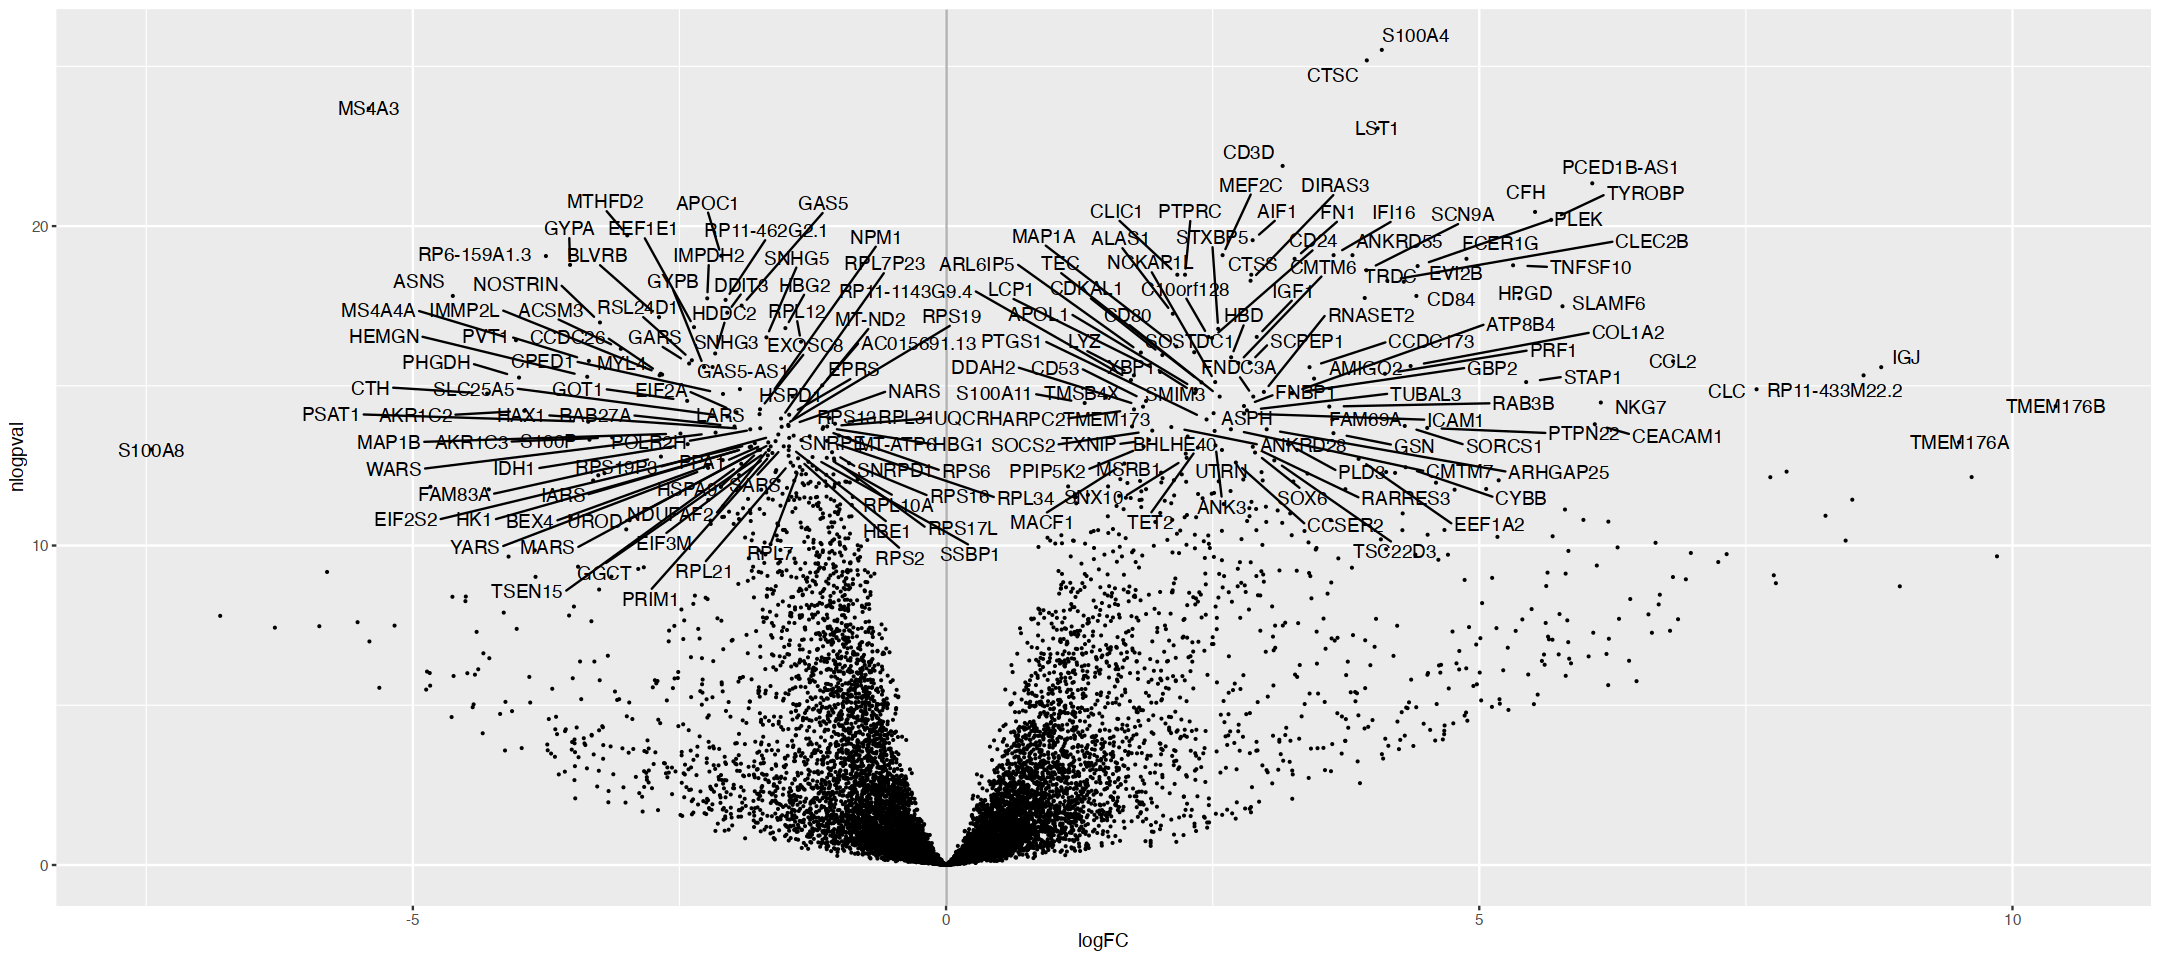

In [19]:
options(repr.plot.width=18, repr.plot.height=8)
ggplot(ptpn1_vsntc, aes(x=logFC, y=nlogpval, label=label)) + 
geom_point(size=0.1) + geom_text_repel(point.padding = 1, max.overlaps=50) +
geom_vline(xintercept=0, alpha=0.3)

Warning message:
"ggrepel: 57 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


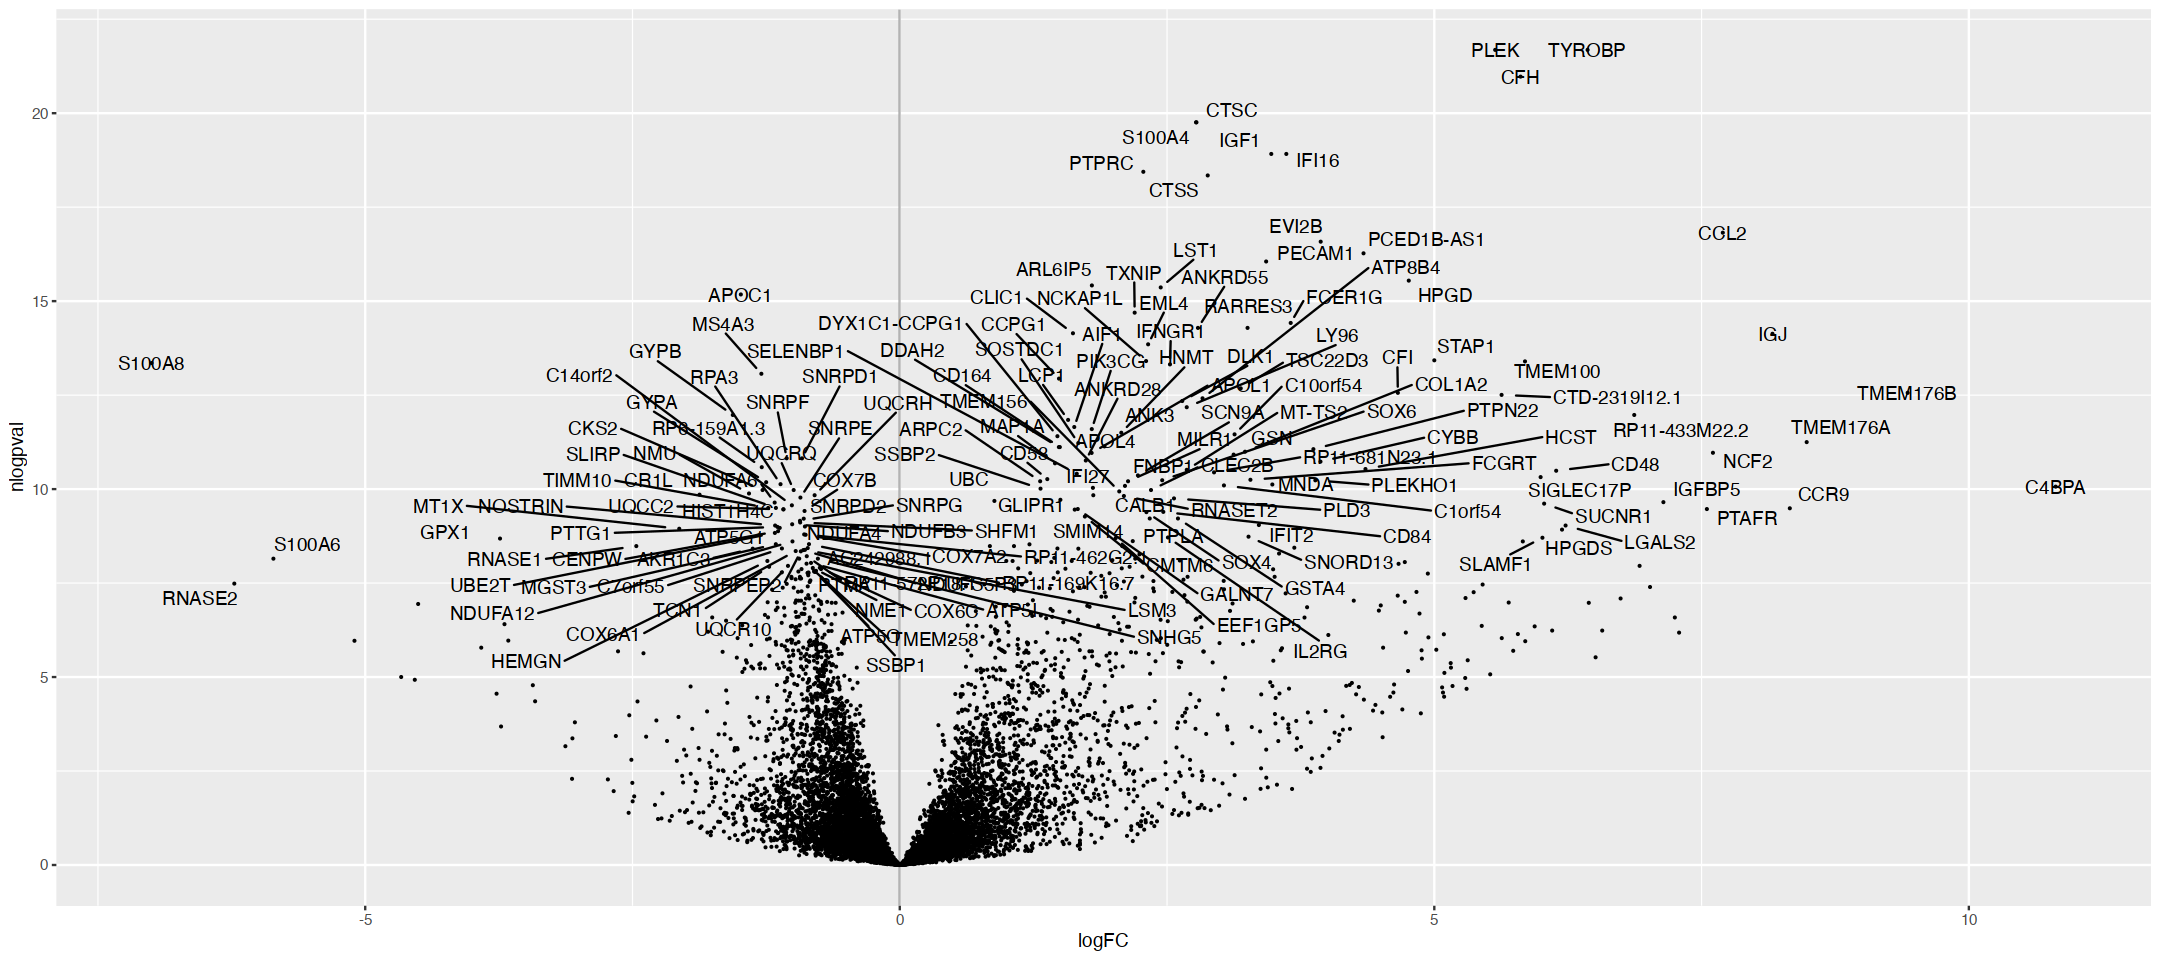

In [20]:
options(repr.plot.width=18, repr.plot.height=8)
ggplot(gata1_vsntc, aes(x=logFC, y=nlogpval, label=label)) + 
geom_point(size=0.1) + geom_text_repel(point.padding = 1, max.overlaps=50) +
geom_vline(xintercept=0, alpha=0.3)

Warning message:
"ggrepel: 104 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


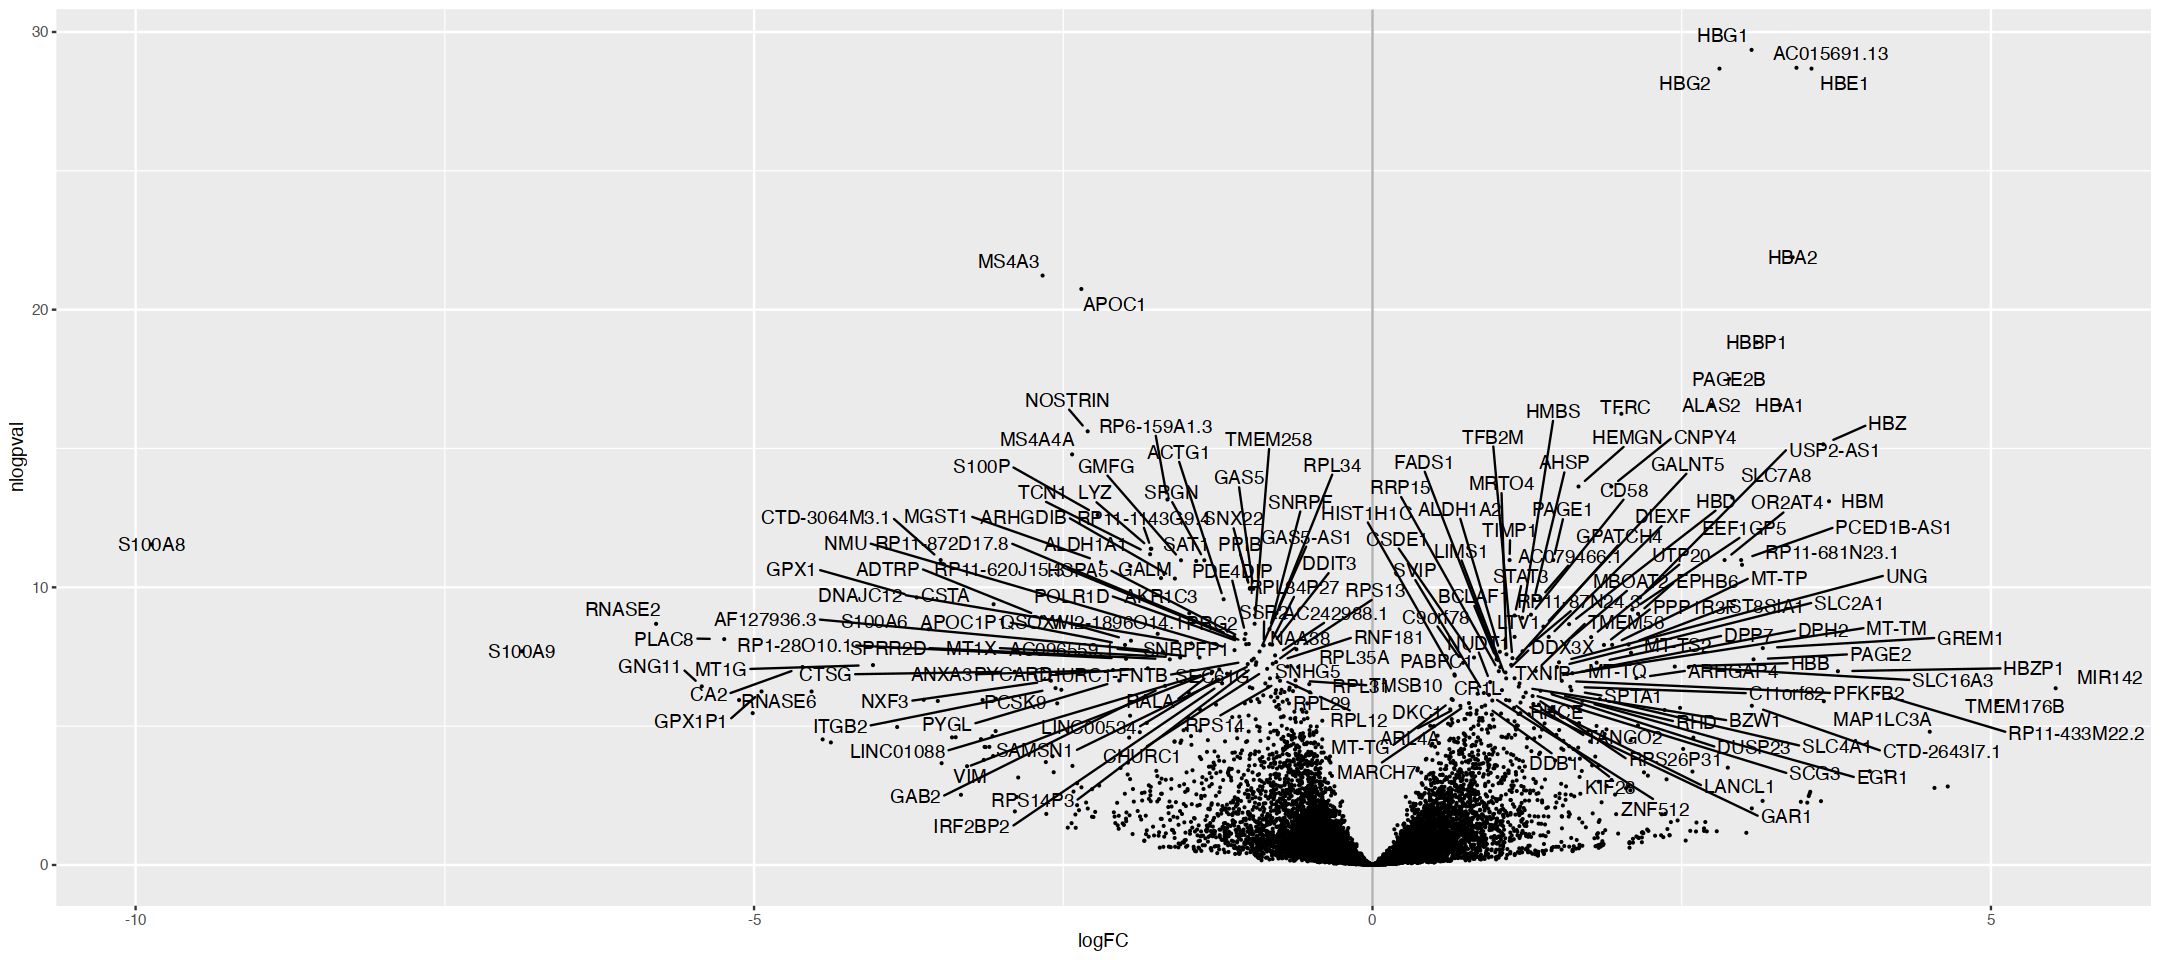

In [21]:
options(repr.plot.width=18, repr.plot.height=8)
ggplot(sgmax_vsntc, aes(x=logFC, y=nlogpval, label=label)) + 
geom_point(size=0.1) + geom_text_repel(point.padding = 1, max.overlaps=50) +
geom_vline(xintercept=0, alpha=0.3)

In [25]:
gata1 <- process_res(makeContrasts(condssgGATA1_BRQ - condssgGATA1_DMSO, levels = colnames(coef(fit))), fit)
ptpn1 <- process_res(makeContrasts(condssgPTPN1_BRQ - condssgPTPN1_DMSO, levels = colnames(coef(fit))), fit)
ntc <- process_res(makeContrasts(condssgNTC1_BRQ - condssgNTC1_DMSO, levels = colnames(coef(fit))), fit)
sgmax <- process_res(makeContrasts(condssgMAX_BRQ - condssgMAX_DMSO, levels = colnames(coef(fit))), fit)


Warning message:
"ggrepel: 44 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


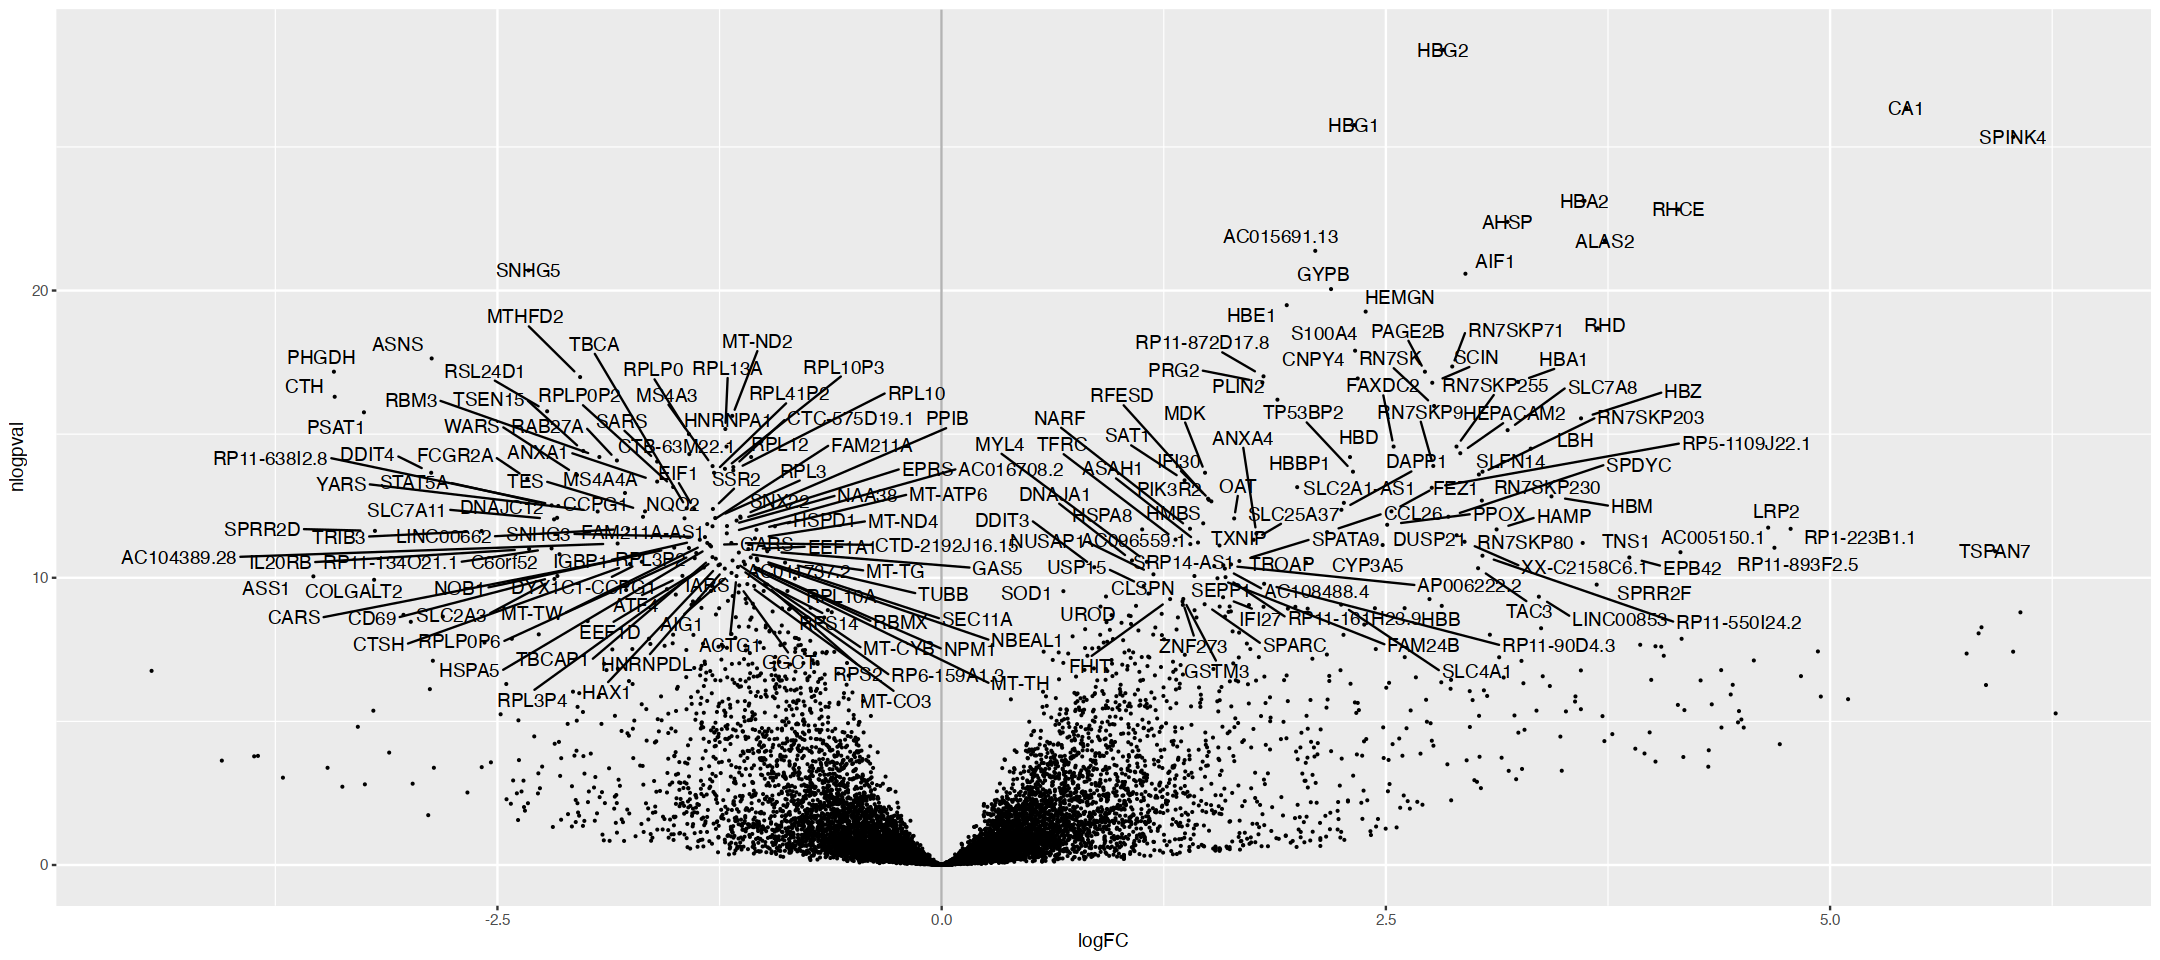

In [26]:
options(repr.plot.width=18, repr.plot.height=8)
ggplot(ntc, aes(x=logFC, y=nlogpval, label=label)) + 
geom_point(size=0.1) + geom_text_repel(point.padding = 1, max.overlaps=50) +
geom_vline(xintercept=0, alpha=0.3)

Warning message:
"ggrepel: 150 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


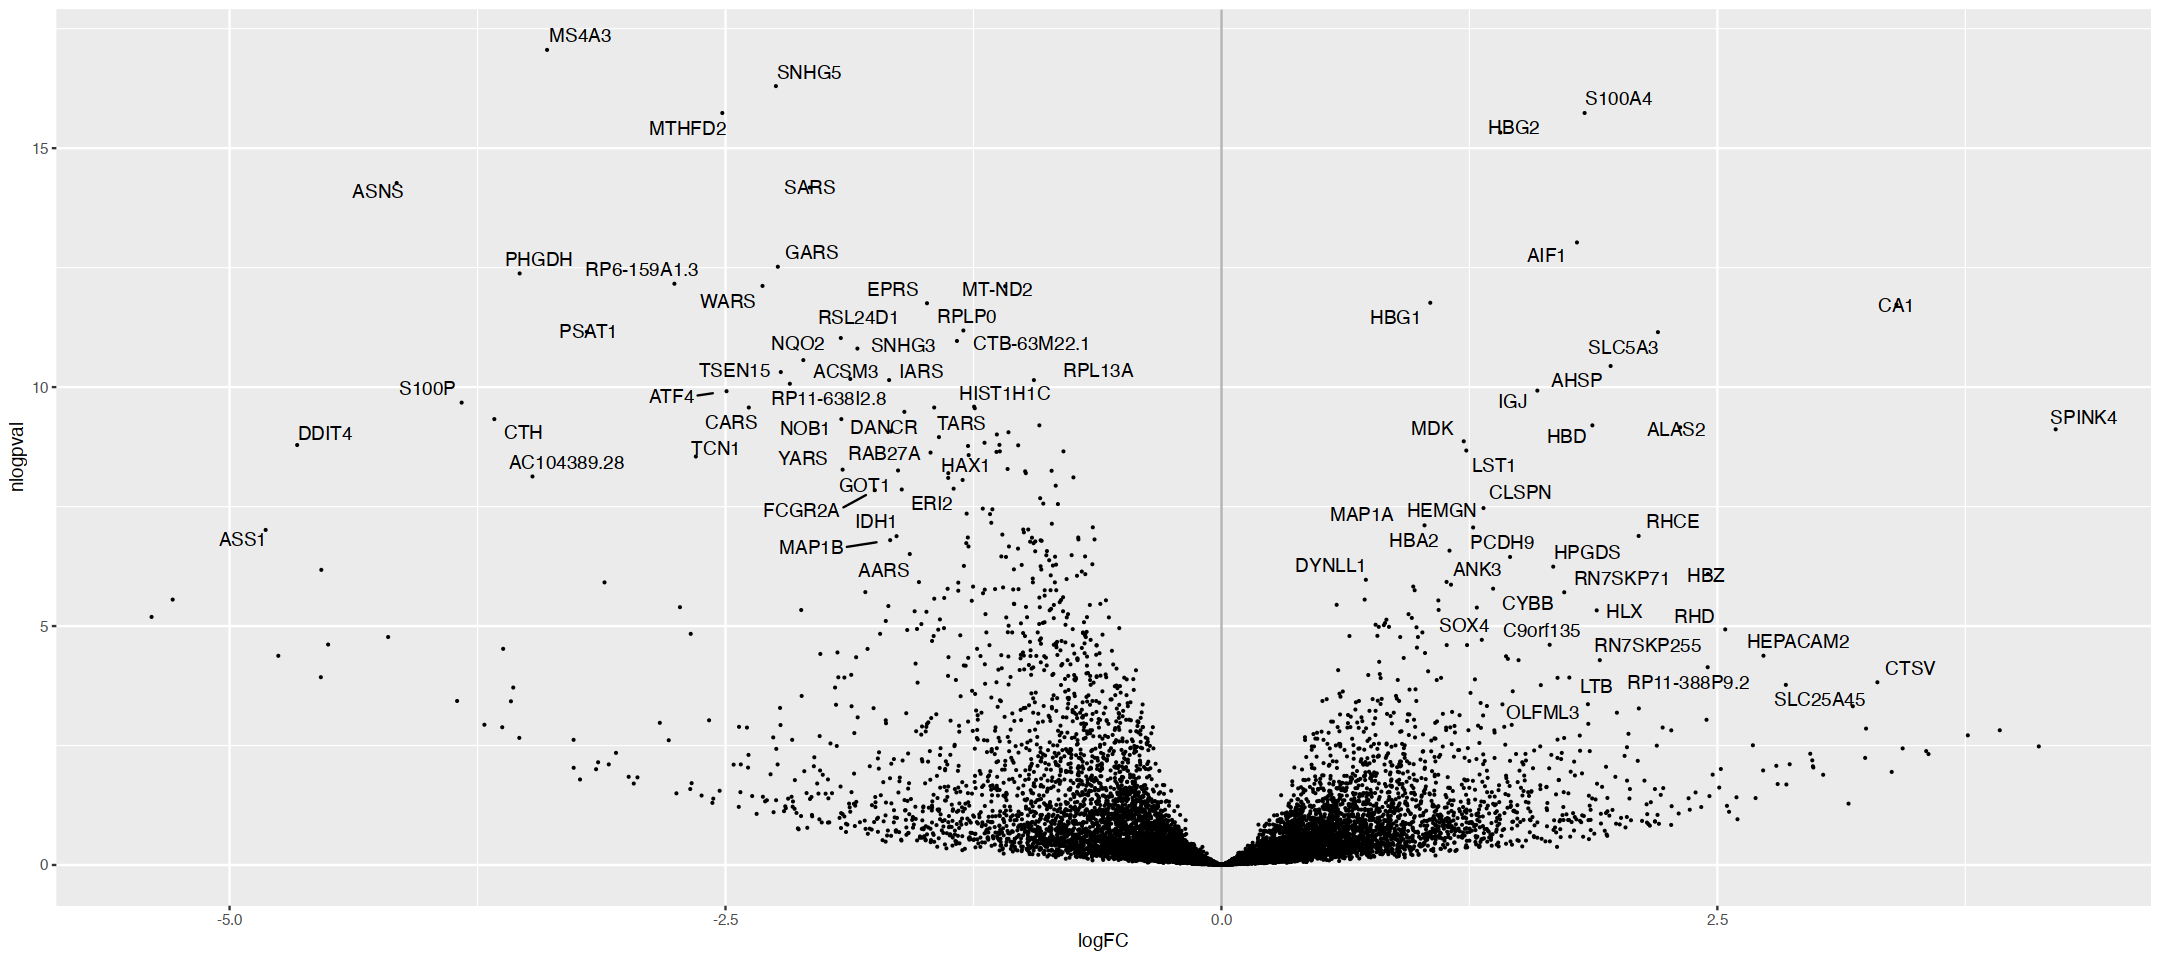

In [27]:
options(repr.plot.width=18, repr.plot.height=8)
ggplot(gata1, aes(x=logFC, y=nlogpval, label=label)) + 
geom_point(size=0.1) + geom_text_repel(point.padding = 1) +
geom_vline(xintercept=0, alpha=0.3)

In [28]:
gata1_brqup = rownames(subset(gata1, adj.P.Val < 0.05 & logFC > 1))
ptpn1_brqup = rownames(subset(ptpn1, adj.P.Val < 0.05 & logFC > 1))
ntc_brqup = rownames(subset(ntc, adj.P.Val < 0.05 & logFC > 1))

myeloid_up = intersect(gata1_brqup, ptpn1_brqup)

myeloid_only_up = setdiff(myeloid_up, ntc_brqup)  # up in sgGATA1 and sgPTPN1, but not in sgNTC
myeloid_both_up = union(setdiff(gata1_brqup, ntc_brqup),
                        setdiff(ptpn1_brqup, ntc_brqup))  # up in sgGATA1 *or* sgPTPN1, but not in sgNTC


ntc_only1_up = setdiff(ntc_brqup, gata1_brqup)
ntc_only2_up = setdiff(ntc_brqup, ptpn1_brqup)

myeloid_only_up
setdiff(gata1_brqup, ntc_brqup)
setdiff(ptpn1_brqup, ntc_brqup)

[1] "SLC5A3"    "HPGDS"     "ESCO2"     "C9orf135"  "ARHGAP24"  "LINC00578"
 [7] "IFI27L2"   "CD101"     "PSPC1"     "CD200R1"   "RAB3B"     "BRIP1"    
[13] "MNS1"      "IDO1"      "TCF19"     "C19orf59"  "IL22RA2"   "GPX5"     
[19] "CA6"

[1] "SLC5A3"         "IGJ"            "LST1"           "MAP1A"         
  [5] "PCDH9"          "HPGDS"          "CYBB"           "ESCO2"         
  [9] "SOX4"           "ATP8B4"         "HLX"            "TMEM106C"      
 [13] "C9orf135"       "GLCCI1"         "TMEM14A"        "TACC1"         
 [17] "ARHGAP24"       "RP11-388P9.2"   "ZEB2"           "LTB"           
 [21] "HLA-DRA"        "HCST"           "PARP14"         "VOPP1"         
 [25] "OLFML3"         "LAMP1"          "RP11-2L8.2"     "CCSER2"        
 [29] "CTD-2017D11.1"  "ERC1"           "OAS3"           "MOCS2"         
 [33] "KIF15"          "SLAMF6"         "LINC00578"      "TRPS1"         
 [37] "FAM111B"        "CLEC2D"         "CD3G"           "NKG7"          
 [41] "NLRC4"          "BTG1"           "SESN1"          "IFI27L2"       
 [45] "CD101"          "WIPF1"          "PIK3R3"         "EFR3A"         
 [49] "GAS7"           "CYTH4"          "PSPC1"          "S100B"         
 [53] "PPP3CA"         "CD4"            "ANKRD20A11P"    "PLBD1"         
 [57] "SAMD9L"         "AC005083.1"     "CRIP2"          "MED11"         
 [61] "HECTD4"         "CARD6"          "RP11-412H8.2"   "MEPCE"         
 [65] "MBD2"           "GXYLT1"         "GPR183"         "ALOX5"         
 [69] "PDE4D"          "AC010127.3"     "CD200R1"        "RAB3B"         
 [73] "PASK"           "S100A8"         "CBLB"           "BRIP1"         
 [77] "ZDHHC12"        "PLEKHA2"        "FAM13B"         "C3orf58"       
 [81] "TNFAIP8L2"      "LINC00476"      "CORO6"          "NFKBID"        
 [85] "RASSF2"         "RAB36"          "ALKBH5"         "ASPN"          
 [89] "MNS1"           "FBXO21"         "FRMD5"          "OR8B5P"        
 [93] "SCIMP"          "AC025171.1"     "MMP9"           "ELK3"          
 [97] "PALB2"          "DPP3"           "FAM46A"         "MBOAT2"        
[101] "NAAA"           "TGFBR2"         "BCL2L11"        "ZNF441"        
[105] "TIMP3"          "THBS1"          "RAG2"           "GBP1"          
[109] "E2F2"           "CDK2AP1"        "GS1-57L11.1"    "SLA"           
[113] "ABHD14A"        "SMURF1"         "ASAP1"          "CPS1"          
[117] "ANKRD13C"       "THBS3"          "CALCRL"         "POC1B-GALNT4"  
[121] "DDX20"          "RUNDC1"         "NEIL3"          "GALNT4"        
[125] "HRH2"           "ARHGAP30"       "IDO1"           "TCF19"         
[129] "ARHGEF7"        "CCDC171"        "NEXN"           "SETMAR"        
[133] "PIP4K2C"        "CCL22"          "DYNLL1-AS1"     "NREP"          
[137] "AC009005.2"     "S100A6"         "RP11-1023L17.2" "TDRD7"         
[141] "ZDHHC5"         "TNFSF9"         "ZNF619"         "C19orf59"      
[145] "ALOX5AP"        "RP11-440I14.2"  "CHAF1A"         "TLCD1"         
[149] "PROSER1"        "NCOA5"          "CCNG2"          "TMEM131"       
[153] "TMEM203"        "IL22RA2"        "LIPA"           "GPX5"          
[157] "ZNF660"         "SLC15A4"        "ZDHHC16"        "RP11-501C14.5" 
[161] "ANXA2R"         "KCTD3"          "RAC1P2"         "RP11-290F20.3" 
[165] "ZNF20"          "DNMBP"          "ZNF592"         "SLC36A4"       
[169] "HOXB2"          "CA6"            "FAM13A-AS1"     "BAALC"

[1] "TCN1"           "IL2RA"          "FCRLA"          "GPX5"          
  [5] "PBK"            "PMCH"           "DDIT3"          "S100P"         
  [9] "IGF1"           "ESCO2"          "SLC5A3"         "TK1"           
 [13] "CA6"            "MLLT11"         "PARPBP"         "RRM2"          
 [17] "C4BPA"          "RAB3B"          "A2ML1"          "LITAF"         
 [21] "ARHGAP24"       "AHI1"           "ALDH1A1"        "APOBEC3B"      
 [25] "APOBEC3A"       "MEIS2"          "CHML"           "IDO1"          
 [29] "KNSTRN"         "FYB"            "ARID5B"         "IQCB1"         
 [33] "PLAC1"          "ADGB"           "STX3"           "ADTRP"         
 [37] "NNT-AS1"        "SFR1"           "C19orf59"       "RCBTB1"        
 [41] "LINC01088"      "CEP128"         "HSD17B4"        "HRC"           
 [45] "ENO3"           "EGFLAM"         "IL22RA2"        "SYNE1"         
 [49] "BRIP1"          "LINC00892"      "LMAN2L"         "ENO2"          
 [53] "PALMD"          "METAP1D"        "RFC3"           "PGM2L1"        
 [57] "LRTOMT"         "AC073135.3"     "UBL7-AS1"       "SPAG1"         
 [61] "BARD1"          "AB015752.3"     "CTD-3064M3.1"   "SLC25A20"      
 [65] "TEX9"           "GULP1"          "LINC01132"      "MLTK"          
 [69] "C9orf135"       "LINC00534"      "SFTPA1"         "GPR98"         
 [73] "RP11-887P2.5"   "FILIP1L"        "PAM"            "MB21D2"        
 [77] "MED29"          "CTB-30L5.1"     "CCDC15"         "TMEM45A"       
 [81] "LINC00923"      "ASF1B"          "ZNF280C"        "CTNNAL1"       
 [85] "HPGDS"          "NT5DC1"         "CTB-114C7.3"    "ZFHX3"         
 [89] "BDH2"           "TCF19"          "GINM1"          "RP11-1250I15.3"
 [93] "KIAA1328"       "BTG3"           "MET"            "CD101"         
 [97] "SERPINI1"       "ASRGL1"         "CTD-2227I18.1"  "AC002331.1"    
[101] "RP11-505E24.2"  "RFPL4B"         "HES1"           "KANSL1"        
[105] "PRTFDC1"        "IFI27L2"        "PSPC1"          "LIX1"          
[109] "PELI1"          "ZNF620"         "FANCM"          "APOBEC3B-AS1"  
[113] "SPATS2L"        "AC006369.2"     "ASAH2B"         "MUT"           
[117] "CD200R1"        "EFCAB7"         "FAM161A"        "WDR54"         
[121] "SOX5"           "LINC00578"      "MZB1"           "SNX30"         
[125] "RND3"           "ARMC2"          "CD86"           "FRK"           
[129] "C1orf216"       "GCNT2"          "CCR9"           "MNDA"          
[133] "NEK2"           "MNS1"           "TOR4A"          "AC009784.3"    
[137] "POLQ"           "RP11-525A16.4"  "ENC1"           "C2orf88"       
[141] "CTD-2256P15.1"  "IQCC"           "AC093716.1"     "ATP6AP1L"      
[145] "CXCL11"         "ZNF608"         "PTPDC1"         "BTN2A2"        
[149] "EMC3-AS1"       "ZNF257"         "C2orf44"        "SERPINH1"      
[153] "SLC2A5"         "AC004158.2"     "TNFAIP3"        "LIPC"          
[157] "FUOM"           "PPM1D"          "PPIC"           "PLEKHO2"       
[161] "TMEM108"        "VCX3B"          "GRIK1"          "MAGEB1"        
[165] "NUP62CL"        "ZNF502"         "RP11-44F21.5"   "TMEM234"       
[169] "TUBA3FP"        "AC004540.5"     "PRNP"           "CTD-2366F13.1" 
[173] "AL034548.1"     "VPS18"          "RP11-889L3.4"   "NUDT15"        
[177] "ISPD-AS1"       "LMO4"           "PKIG"           "C18orf54"      
[181] "HOXB-AS1"       "C10orf71"       "PARD3"          "LMO7"          
[185] "INPP1"          "CTD-2313P7.1"   "HDDC3"          "MAST4-AS1"     
[189] "DLX1"           "CPNE5"          "TTC23"          "GCNT3"         
[193] "AP000330.8"     "UBE2D1"         "TBC1D1"         "DLX2"          
[197] "HTR1F"          "DYRK3"          "AP001347.6"     "SCRG1"

In [29]:
gata1_brqup = rownames(subset(gata1, adj.P.Val < 0.05 & logFC > 1))
gata1_up = rownames(subset(gata1_vsntc, adj.P.Val < 0.05))  # not diff expr in GATA1vsNTC (in either direction!)

setdiff(setdiff(gata1_brqup, ntc_brqup), gata1_up)  # things that are up in GATA1+BRQ but not in NTC+BRQ or GATA1vsNTC

[1] "TMEM14A"       "ARHGAP24"      "ZEB2"          "VOPP1"        
 [5] "LAMP1"         "CTD-2017D11.1" "ERC1"          "OAS3"         
 [9] "KIF15"         "BTG1"          "SESN1"         "PIK3R3"       
[13] "EFR3A"         "GAS7"          "S100B"         "ANKRD20A11P"  
[17] "AC005083.1"    "MED11"         "HECTD4"        "CARD6"        
[21] "MEPCE"         "PDE4D"         "RAB3B"         "BRIP1"        
[25] "PLEKHA2"       "FAM13B"        "C3orf58"       "LINC00476"    
[29] "CORO6"         "NFKBID"        "ASPN"          "MNS1"         
[33] "FBXO21"        "FRMD5"         "OR8B5P"        "AC025171.1"   
[37] "ELK3"          "PALB2"         "DPP3"          "FAM46A"       
[41] "ZNF441"        "TIMP3"         "RAG2"          "E2F2"         
[45] "CDK2AP1"       "GS1-57L11.1"   "ABHD14A"       "SMURF1"       
[49] "ASAP1"         "CPS1"          "ANKRD13C"      "DDX20"        
[53] "RUNDC1"        "HRH2"          "ARHGAP30"      "ARHGEF7"      
[57] "NEXN"          "PIP4K2C"       "DYNLL1-AS1"    "NREP"         
[61] "AC009005.2"    "TDRD7"         "ZDHHC5"        "TNFSF9"       
[65] "ZNF619"        "C19orf59"      "ALOX5AP"       "CHAF1A"       
[69] "TLCD1"         "PROSER1"       "NCOA5"         "CCNG2"        
[73] "TMEM131"       "TMEM203"       "IL22RA2"       "LIPA"         
[77] "ZNF660"        "ZDHHC16"       "RP11-501C14.5" "ANXA2R"       
[81] "RAC1P2"        "ZNF20"         "DNMBP"         "ZNF592"       
[85] "SLC36A4"       "FAM13A-AS1"

In [30]:
gata1[setdiff(setdiff(gata1_brqup, ntc_brqup), gata1_up),][1:50,]
#ptpn1[setdiff(setdiff(ptpn1_brqup, ntc_brqup), ptpn1_up), ][1:50,]

,logFC,AveExpr,t,P.Value,adj.P.Val,B,gene,nlogpval,label
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>
TMEM14A,1.135601,5.1578741,6.092274,5.679864e-07,2.501626e-05,5.93638099,TMEM14A,4.601778,TMEM14A
ARHGAP24,1.443968,4.5466283,5.825781,1.278264e-06,4.855774e-05,5.29145125,ARHGAP24,4.313741,ARHGAP24
ZEB2,1.041847,4.9528868,5.598869,2.552639e-06,8.851128e-05,4.47601857,ZEB2,4.053001,ZEB2
VOPP1,1.306616,4.0688096,5.004852,1.555065e-05,4.067724e-04,2.93162301,VOPP1,3.390649,VOPP1
LAMP1,1.338278,3.6948450,4.948230,1.845876e-05,4.707393e-04,2.82835642,LAMP1,3.327219,LAMP1
CTD-2017D11.1,1.993439,2.1756708,4.817751,2.737696e-05,6.505028e-04,2.47105550,CTD-2017D11.1,3.186751,
ERC1,1.319052,3.4520627,4.761362,3.244719e-05,7.428601e-04,2.27040073,ERC1,3.129093,
OAS3,2.445282,2.0189028,4.676903,4.182712e-05,9.151979e-04,2.01442625,OAS3,3.038485,
KIF15,1.077468,4.9449658,4.610759,5.100367e-05,1.061731e-03,1.69030910,KIF15,2.973986,


In [31]:
plot_gene = function(x, leg=F) {
    df = data.frame(cbind(norm_data[x,], samples$perturbation, samples$drug))
    colnames(df) = c("log_tpm", "sgrna", "tx")

    df$cond = factor(df$sgrna, levels=c("sgNTC1", "sgGATA1", "sgMAX", "sgPTPN1"))
    df = subset(df, cond == "sgNTC1")

    df$tx = factor(df$tx, levels=c("DMSO", "BRQ"))
    df$log_tpm = as.numeric(df$log_tpm)

    #ggplot(df, aes(x=cond, y=log_tpm, fill=tx)) + geom_boxplot() + geom_point(position = position_dodge(width=0.75)) + theme_bw()
    g1 = ggplot(df, aes(x=cond, y=log_tpm, fill=tx)) + geom_boxplot() +
    geom_point(position = position_dodge(width=0.75)) + theme_bw(base_size=12) + ggtitle(x) +
    theme(panel.grid.major=element_blank(), panel.grid.minor = element_blank(),
    axis.text.x=element_text(angle=45, hjust=1)) + labs(x="", y="log2 TPM", fill="Treatment")

    if (leg==F) g1 = g1 + theme(legend.position = "None")
    return(g1)
}


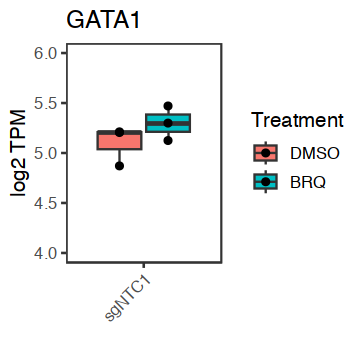

In [32]:
options(repr.plot.width=3, repr.plot.height=3)
plot_gene("GATA1", leg=T)  + ylim(4,6)
ggsave("../output/220522_k562_gata1.pdf", width=3, height=3)

In [33]:
# compare everything to sgNTC

all_conds <- unique(conds)

cond_to_res <- list()
for (cond1 in all_conds[1:4]) {
    if (cond1 == "sgNTC1_DMSO") next
    cond2 = "sgNTC1_DMSO"
    cond_stmt = paste("conds", cond1, " - ", "conds", cond2, sep = "")
    print(cond_stmt)
    res <- process_res(makeContrasts(cond_stmt, levels = colnames(coef(fit))), fit)
    cond_to_res[[cond1]] <- res
}


[1] "condssgNTC1_BRQ - condssgNTC1_DMSO"
[1] "condssgGATA1_DMSO - condssgNTC1_DMSO"
[1] "condssgGATA1_BRQ - condssgNTC1_DMSO"


In [34]:
# get logFC for genes
pvals = as.data.frame(cond_to_res$sgNTC1_BRQ[order(cond_to_res$sgNTC1_BRQ$gene),]$gene)
pvals = cbind(pvals, 0)
cond_list = c("genes", "sgNTC1_DMSO")
for (cond1 in all_conds[1:4]) {
    if (cond1 == "sgNTC1_DMSO") next
    cond_list = c(cond_list, cond1)  # add to column names
    pvals = cbind(pvals, cond_to_res[[cond1]][order(cond_to_res[[cond1]]$gene),]$adj.P.Val)
}
colnames(pvals) = cond_list
rownames(pvals) = pvals$genes
pvals = pvals[,2:dim(pvals)[2]]

sig_genes = rownames(pvals[apply(pvals[,2:4], 1, min) < 0.05,])
length(sig_genes)

[1] 7457

In [35]:

# get logFC for genes
logFCs = as.data.frame(cond_to_res$sgNTC1_BRQ[order(cond_to_res$sgNTC1_BRQ$gene),]$gene)
logFCs = cbind(logFCs, 0)
cond_list = c("genes", "sgNTC1_DMSO")
for (cond1 in all_conds[1:4]) {
    if (cond1 == "sgNTC1_DMSO") next
    cond_list = c(cond_list, cond1)  # add to column names
    logFCs = cbind(logFCs, cond_to_res[[cond1]][order(cond_to_res[[cond1]]$gene),]$logFC)
}
colnames(logFCs) = cond_list
#logFCs = logFCs[!(logFCs$genes %in% c("", "Mtcp1", "Csnk2a1")),]
rownames(logFCs) = logFCs$genes
logFCs = logFCs[,2:dim(logFCs)[2]]
logFCs = logFCs[sig_genes,]
dim(logFCs)
head(logFCs)

[1] 7457    4

,sgNTC1_DMSO,sgNTC1_BRQ,sgGATA1_DMSO,sgGATA1_BRQ
,<dbl>,<dbl>,<dbl>,<dbl>
A2ML1,0,0.8425188,1.9287727,2.6636189
AAED1,0,0.4816119,-0.1667177,-1.1428856
AAK1,0,-0.7864647,0.5498300,0.2537077
AAMDC,0,0.7581898,-0.1094109,0.1625752
AAMP,0,-0.6498811,0.1140474,-0.1420758
AAR2,0,0.2704011,0.4821679,0.6480443


In [36]:
cond1 = "sgNTC1_BRQ"
cond2 = "sgNTC1_DMSO"
res1 <- process_res(makeContrasts(paste("conds", cond1, " - ", "conds", cond2, sep=""), 
                                 levels = colnames(coef(fit))), fit)

cond1 = "sgGATA1_BRQ"
cond2 = "sgGATA1_DMSO"
res2 <- process_res(makeContrasts(paste("conds", cond1, " - ", "conds", cond2, sep=""), 
                                 levels = colnames(coef(fit))), fit)

a = subset(res1, adj.P.Val<1e-2 & logFC>1)$gene
b = subset(res2, adj.P.Val<1e-2 & logFC>1)$gene
length(a)
length(b)
length(intersect(a,b))

[1] 628

[1] 154

[1] 65

Warning message:
"The input is a data frame, convert it to a matrix."


pdf 
  2

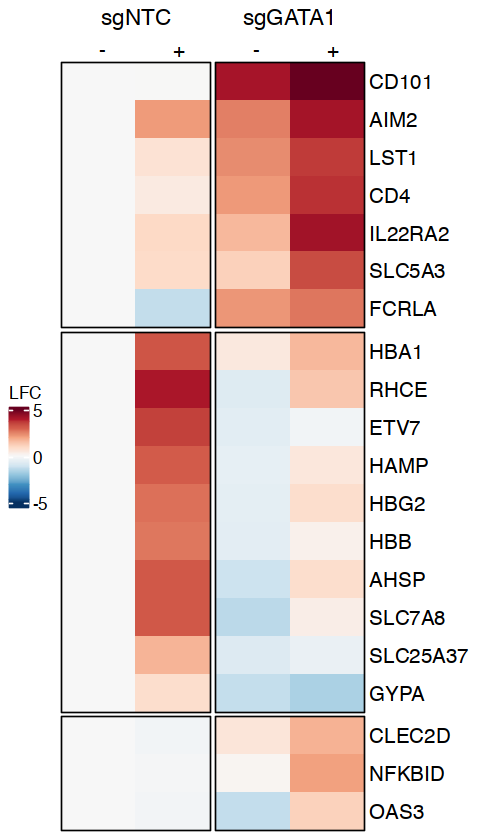

In [37]:
plotted_genes <- c("GYPA", "HAMP", "SLC5A3", "ETV7", "SLC7A8", "HBA1", "CLEC2D", "IL22RA2", "FCRLA", 
           "HBG2", "AHSP", "RHCE", "HBB", "NFKBID", "OAS3", "CD4", "LST1", "CD101", "AIM2", "SLC25A37")
col_fun <- colorRamp2(seq(-5, 5, length.out = 11),
                      rev(brewer.pal(11, "RdBu")), space = "RGB")
options(repr.plot.width = 4, repr.plot.height = 7)
h <- Heatmap(logFCs[plotted_genes, 1:4], col = col_fun, cluster_columns = F,
              column_labels = rep(c("-", "+"), 2),
              column_names_rot = 0, column_names_side = "top",
              cluster_rows = T, row_km = 3, row_km_repeats = 500,
              show_row_dend = FALSE, row_title = NULL,
              name = "LFC",
              column_split = factor(c("sgNTC", "sgNTC", "sgGATA1",
              "sgGATA1"), levels=c("sgNTC", "sgGATA1")), border = T)
draw(h, heatmap_legend_side = "left")

pdf("../output/220520_gata1_heatmap.pdf", width=4, height=6)
draw(h, heatmap_legend_side = "left")
dev.off()



In [38]:
a = with(logFCs, sgGATA1_DMSO - sgNTC1_DMSO)
b = with(logFCs, sgNTC1_BRQ - sgNTC1_DMSO)
d = with(logFCs, sgGATA1_BRQ - sgGATA1_DMSO) - b

coeffs = as.data.frame(cbind(a, b, d))
rownames(coeffs) = rownames(logFCs)
colnames(coeffs) = c("sggata1", "brq", "interaction")
head(coeffs)

,sggata1,brq,interaction
,<dbl>,<dbl>,<dbl>
A2ML1,1.9287727,0.8425188,-0.1076726
AAED1,-0.1667177,0.4816119,-1.4577798
AAK1,0.5498300,-0.7864647,0.4903424
AAMDC,-0.1094109,0.7581898,-0.4862037
AAMP,0.1140474,-0.6498811,0.3937578
AAR2,0.4821679,0.2704011,-0.1045246


## GSEA for BRQ

In [39]:
# primary erythroid data from supplemental tables in Ludwig et al. 2019

cd34_data = read_excel("../data/220303_ludwig_mmc4.xlsx")
head(cd34_data)

gene,cluster,HSC,MPP,CMP,MEP,P1,P2,P3,P4,P5,P6,P7,P8,diff
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
TULP2,K7,1.09,0.68,0.32,0.39,0.30,0.08,0.26,0.44,0.15,0.45,1.87,4.43,2.56
ATF3,K7,5.64,5.16,4.03,2.15,2.06,1.11,1.21,2.23,3.69,3.28,3.83,6.26,2.43
HBA1,K6,0.00,0.00,0.00,0.07,2.37,5.55,5.25,6.20,8.62,9.37,9.91,12.31,2.40
RP11-874J12.4,K7,0.00,0.00,0.20,0.47,0.97,1.54,1.09,0.78,1.14,1.18,1.76,4.07,2.31
TRIB3,K6,3.06,2.86,3.19,2.46,5.32,4.01,3.18,3.88,7.73,7.76,7.17,9.42,2.25
KIF5A,K2,4.30,4.23,1.98,1.78,1.34,2.44,3.30,4.66,3.69,1.22,0.97,3.20,2.23


In [40]:
diff_p7p8_hscmpp = apply(cd34_data[,c("P7", "P8")], 1, mean) - apply(cd34_data[,c("HSC", "MPP")], 1, mean)
cd34_data$diff_p7p8_hscmpp = diff_p7p8_hscmpp

diff_hscmpp_p7p8 = apply(cd34_data[,c("HSC", "MPP")], 1, mean) - apply(cd34_data[,c("P7", "P8")], 1, mean)
cd34_data$diff_hscmpp_p7p8 = diff_hscmpp_p7p8

head(cd34_data)


gene,cluster,HSC,MPP,CMP,MEP,P1,P2,P3,P4,P5,P6,P7,P8,diff,diff_p7p8_hscmpp,diff_hscmpp_p7p8
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
TULP2,K7,1.09,0.68,0.32,0.39,0.30,0.08,0.26,0.44,0.15,0.45,1.87,4.43,2.56,2.265,-2.265
ATF3,K7,5.64,5.16,4.03,2.15,2.06,1.11,1.21,2.23,3.69,3.28,3.83,6.26,2.43,-0.355,0.355
HBA1,K6,0.00,0.00,0.00,0.07,2.37,5.55,5.25,6.20,8.62,9.37,9.91,12.31,2.40,11.110,-11.110
RP11-874J12.4,K7,0.00,0.00,0.20,0.47,0.97,1.54,1.09,0.78,1.14,1.18,1.76,4.07,2.31,2.915,-2.915
TRIB3,K6,3.06,2.86,3.19,2.46,5.32,4.01,3.18,3.88,7.73,7.76,7.17,9.42,2.25,5.335,-5.335
KIF5A,K2,4.30,4.23,1.98,1.78,1.34,2.44,3.30,4.66,3.69,1.22,0.97,3.20,2.23,-2.180,2.180


In [41]:
shared_genes = intersect(cd34_data$gene, row.names(ntc))
cd34_data = cd34_data[which(cd34_data$gene %in% shared_genes),]
cd34_up = cd34_data[order(cd34_data$diff_hscmpp_p7p8),][1:200,]$gene
cd34_down = cd34_data[order(-cd34_data$diff_hscmpp_p7p8),][1:200,]$gene

pathways = list()
pathways[[1]] = cd34_up
pathways[[2]] = cd34_down
names(pathways) = c("top", "bottom")

length(cd34_up)
length(cd34_down)


[1] 200

[1] 200

In [42]:
brq_lfc = ntc$logFC
names(brq_lfc) = rownames(ntc)
head(brq_lfc)

HBG2      CA1     HBG1   SPINK4     HBA2     RHCE 
2.821905 5.429587 2.321313 6.031255 3.618024 4.146308

In [43]:
up = subset(ntc, logFC > 1 & adj.P.Val < 0.05)
dim(up)
length(intersect(cd34_up, rownames(up)))

down = subset(ntc, logFC < -1 & adj.P.Val < 0.05)
dim(down)
length(intersect(cd34_down, rownames(down)))

[1] 731   9

[1] 64

[1] 626   9

[1] 17

In [44]:
z = intersect(cd34_up, rownames(up))
z[order(z)]

z = intersect(cd34_down, rownames(down))
z[order(z)]

z = setdiff(cd34_down, rownames(down))
z[order(z)]

[1] "ACSL6"         "AHSP"          "AK1"           "ALAS2"        
 [5] "ARG1"          "C1orf109"      "C1orf116"      "CA1"          
 [9] "CCRL2"         "CHST2"         "CMKLR1"        "CPEB4"        
[13] "EHD1"          "EPB42"         "EPOR"          "ERMAP"        
[17] "FAM46C"        "FAM65C"        "GUK1"          "GYPB"         
[21] "HBA1"          "HBA2"          "HBB"           "HBD"          
[25] "HBG1"          "HBG2"          "HBM"           "HEPACAM2"     
[29] "HMBS"          "HPS1"          "IFI27"         "KEL"          
[33] "KIAA0513"      "KLF1"          "KLHL21"        "LBH"          
[37] "MICAL2"        "MOB3C"         "MYL4"          "NARF"         
[41] "NRIP3"         "OSBP2"         "PPOX"          "RFESD"        
[45] "RHCE"          "RHD"           "RP11-486A14.2" "RSAD2"        
[49] "SAT1"          "SLC22A4"       "SLC25A37"      "SLC2A1"       
[53] "SLC4A1"        "SLFN14"        "SPTA1"         "SPTB"         
[57] "SQSTM1"        "TANGO2"        "TCEANC"        "TMC5"         
[61] "TMEM56"        "TSKU"          "TUBA4A"        "TUBB2A"

[1] "ADRBK2"  "ALDH1A1" "BCAT1"   "CCND2"   "CYFIP2"  "DTD1"    "MYB"    
 [8] "NPM1"    "RCSD1"   "RNF130"  "RUNX2"   "SDPR"    "SLC38A1" "SPTBN1" 
[15] "STAT5A"  "TMEM173" "VIM"

[1] "ABL2"     "AGO1"     "AGPS"     "AHNAK"    "AIF1"     "AIM1"    
  [7] "AKT3"     "ANGPT1"   "ANKRD28"  "ANKRD50"  "ANO6"     "ANP32A"  
 [13] "ANTXR2"   "APPL1"    "ARF3"     "ARHGAP5"  "ARHGDIB"  "ARHGEF6" 
 [19] "ARID5B"   "ATP2A2"   "ATP8B4"   "B3GNT5"   "BCR"      "BHLHE40" 
 [25] "CALN1"    "CBL"      "CBX1"     "CCDC171"  "CCDC88A"  "CD37"    
 [31] "CD53"     "CD74"     "CDCA7"    "CDCP1"    "CDK6"     "CELF2"   
 [37] "CERK"     "CERS6"    "CFH"      "CHD6"     "CLSTN1"   "CTDSPL"  
 [43] "CTSS"     "CYSLTR1"  "DICER1"   "DNAJC10"  "DOCK2"    "DOCK8"   
 [49] "DPPA4"    "DSG2"     "EIF2AK2"  "EIF4G3"   "ELK3"     "ELMO1"   
 [55] "ERMP1"    "ERO1L"    "ESYT2"    "ETS2"     "ETV6"     "EVI2B"   
 [61] "FAM102B"  "FLNB"     "FNBP1"    "FXYD5"    "GALNT1"   "GIMAP2"  
 [67] "GLIPR1"   "GLUD1"    "GNPTAB"   "HIST1H1D" "HIST1H1E" "HLA-DPA1"
 [73] "HLA-DRA"  "HLA-DRB1" "HSD17B12" "ICAM3"    "IFI16"    "IQGAP2"  
 [79] "KCTD3"    "KDM1A"    "KIF13A"   "KIF2A"    "KLHL42"   "LAPTM4B" 
 [85] "LCP1"     "LDHA"     "LDHB"     "LMO2"     "LPCAT2"   "LPGAT1"  
 [91] "LRRFIP1"  "LYN"      "MACF1"    "MAGED1"   "MAP7D3"   "MCCC2"   
 [97] "ME2"      "MECOM"    "MEF2C"    "MEIS1"    "MGAT5"    "MLH3"    
[103] "MPP6"     "MSN"      "MYADM"    "MYCBP2"   "NAV1"     "NCKAP1L" 
[109] "NEDD4"    "NF1"      "NFATC2"   "NFIB"     "NFIL3"    "NFKB1"   
[115] "NIN"      "NOTCH2"   "NREP"     "NRIP1"    "NUDT3"    "PBX1"    
[121] "PCDH9"    "PCYOX1"   "PEBP1"    "PHF14"    "PIK3CG"   "PLAC8"   
[127] "PLAGL1"   "PLCB1"    "PLEKHA2"  "PLEKHA5"  "POGK"     "PPM1H"   
[133] "PRKACB"   "PRKD3"    "PSIP1"    "PTGS1"    "PTPRC"    "QSER1"   
[139] "REPS1"    "RHOH"     "RUNX1"    "SACS"     "SERPINB6" "SERPINB9"
[145] "SH3KBP1"  "SLC12A2"  "SLC35B4"  "SLC44A1"  "SMARCA2"  "SOX4"    
[151] "SPARC"    "SPIN1"    "ST8SIA6"  "SWAP70"   "SYK"      "SYNE1"   
[157] "TARBP1"   "TBC1D5"   "TCEAL4"   "TCF4"     "TET1"     "TGFBRAP1"
[163] "THRB"     "TIMP3"    "TMEM246"  "TNFRSF1A" "TRIM44"   "TTC3"    
[169] "TUBA1A"   "URI1"     "UTRN"     "WIPF1"    "XYLT1"    "ZBTB38"  
[175] "ZC3H12C"  "ZDHHC9"   "ZFHX3"    "ZMYM3"    "ZMYM4"    "ZNF124"  
[181] "ZNF43"    "ZNF652"   "ZNHIT6"

In [45]:
norm_data["HBG2",]

1_NTC_DMSO_rep1    2_NTC_DMSO_rep2    3_NTC_DMSO_rep3     4_NTC_BRQ_rep1 
          12.79123           12.91896           13.01847           15.83249 
    5_NTC_BRQ_rep2     6_NTC_BRQ_rep3  7_GATA1_DMSO_rep1  8_GATA1_DMSO_rep2 
          15.63097           15.72065           12.37159           12.32428 
 9_GATA1_DMSO_rep3  10_GATA1_BRQ_rep1  11_GATA1_BRQ_rep2  12_GATA1_BRQ_rep3 
          12.46828           13.80836           13.78743           13.79638 
13_PTPN1_DMSO_rep1 14_PTPN1_DMSO_rep2 15_PTPN1_DMSO_rep3  16_PTPN1_BRQ_rep1 
          11.41071           11.40732           11.37577           11.66775 
 17_PTPN1_BRQ_rep2  18_PTPN1_BRQ_rep3   19_MAX_DMSO_rep1   20_MAX_DMSO_rep2 
          11.62352           11.64760           15.77408           15.80954 
  21_MAX_DMSO_rep3    22_MAX_BRQ_rep1    23_MAX_BRQ_rep2    24_MAX_BRQ_rep3 
          15.51588           16.82029           16.92087           16.90115

In [46]:
tfs = c("MEIS1", "RUNX1", "MECOM", "MYB", "MEF2C", "SOX4", "KDM1A", "NPM1", "RUNX2")
ntc[tfs,]  # MEIS1, RUNX1, MECOM, MEF2C, SOX4 -- but note many of these are not expressed super highly in K562 
cd34_data[which(cd34_data$gene %in% tfs),]

,logFC,AveExpr,t,P.Value,adj.P.Val,B,gene,nlogpval,label
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>
MEIS1,0.532799392,2.620027,1.69345286,9.919066e-02,2.044345e-01,-5.105088,MEIS1,0.68944575,
RUNX1,-0.100510557,3.601721,-0.50502366,6.166855e-01,7.421131e-01,-6.781699,RUNX1,0.12952993,
MECOM,-0.203789743,3.521163,-0.87570709,3.871182e-01,5.452292e-01,-6.499099,MECOM,0.26342089,
MYB,-1.342759428,5.025145,-8.46195833,5.225376e-10,1.972414e-08,12.670858,MYB,7.70500193,
MEF2C,-0.442183457,6.314478,-3.29869353,2.226706e-03,1.015232e-02,-2.400864,MEF2C,1.99343469,
SOX4,0.768093778,3.998582,3.08797242,3.914571e-03,1.607615e-02,-2.508780,SOX4,1.79381801,
KDM1A,0.007926093,5.498735,0.05986148,9.526041e-01,9.734140e-01,-7.334195,KDM1A,0.01170242,
NPM1,-1.029998836,10.374948,-10.93745273,7.056169e-13,4.950940e-11,18.836836,NPM1,10.30531231,NPM1
RUNX2,-1.560085975,1.656364,-2.87552470,6.799470e-03,2.513975e-02,-2.502162,RUNX2,1.59963904,


gene,cluster,HSC,MPP,CMP,MEP,P1,P2,P3,P4,P5,P6,P7,P8,diff,diff_p7p8_hscmpp,diff_hscmpp_p7p8
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
RUNX2,K1,7.72,7.47,7.41,5.79,5.56,1.90,0.34,0.22,0.10,0.23,0.36,0.61,0.25,-7.110,7.110
MECOM,K1,7.52,6.95,5.12,5.04,4.07,2.88,1.74,0.43,0.15,0.04,0.02,0.00,-0.02,-7.225,7.225
MEF2C,K2,8.57,8.33,7.68,8.19,6.28,5.41,4.73,3.42,0.63,0.21,0.37,0.29,-0.08,-8.120,8.120
SOX4,K1,7.36,7.81,8.25,7.89,5.59,3.04,1.87,0.80,0.42,0.12,0.49,0.39,-0.10,-7.145,7.145
MYB,K2,9.39,9.50,9.97,10.41,7.19,6.30,5.47,4.78,2.56,0.82,0.77,0.66,-0.11,-8.730,8.730
MEIS1,K2,7.86,7.66,6.35,5.48,6.76,4.14,3.32,2.72,1.50,0.70,0.36,0.13,-0.23,-7.515,7.515
NPM1,K2,11.69,11.68,11.63,11.89,9.91,10.93,10.83,10.31,7.90,6.11,4.64,4.15,-0.49,-7.290,7.290
RUNX1,K2,9.07,9.35,9.98,9.05,8.40,5.99,5.01,4.55,3.18,2.33,1.61,1.00,-0.61,-7.905,7.905
KDM1A,K2,7.94,7.89,8.28,8.65,5.68,5.72,5.48,5.15,4.65,4.13,1.92,1.20,-0.72,-6.355,6.355


Loading required package: fgsea



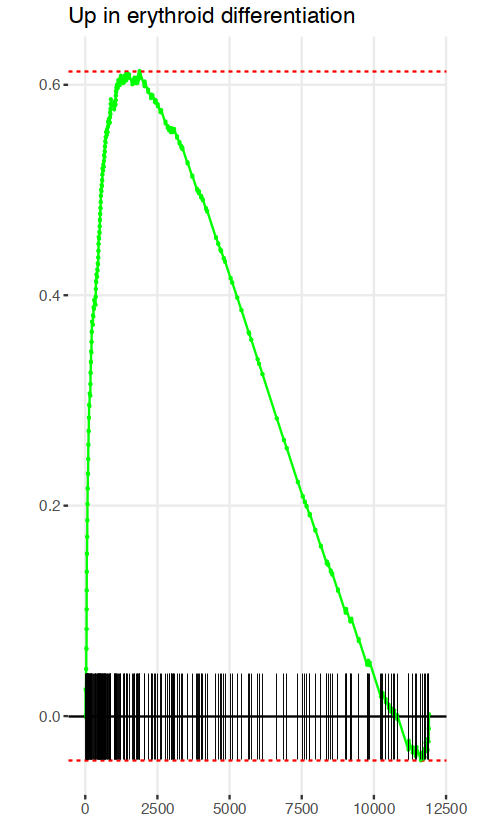

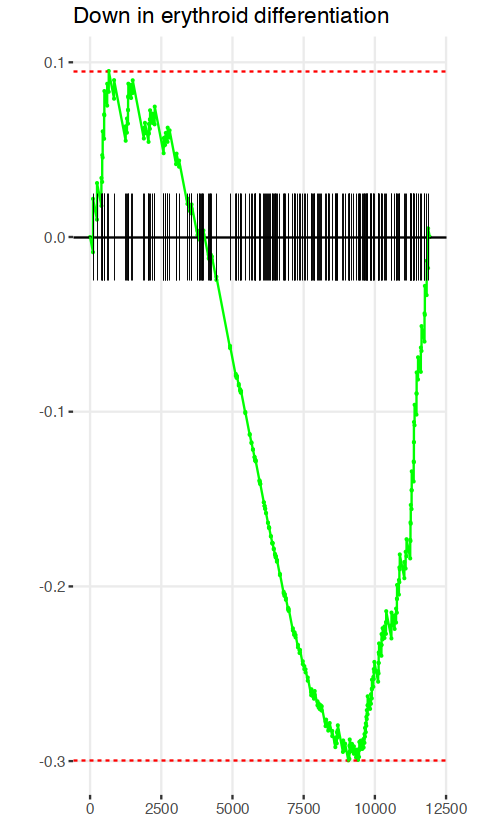

In [47]:
brq_lfc = ntc$logFC
names(brq_lfc) = rownames(ntc)

require(fgsea)
#pdf("../output/220320_k562_brq_up_gsea.pdf", width=3.5, height=1.6)
plotEnrichment(pathways[["top"]],
               brq_lfc) + labs(title="Up in erythroid differentiation") + ylab("") + xlab("") +
               theme(plot.margin = margin(t = 4, r = 20, b = 0, l = 10, unit = "pt"))
#dev.off()


#pdf("../output/220320_k562_brq_down_gsea.pdf", width=3.5, height=1.6)
plotEnrichment(pathways[["bottom"]],
               brq_lfc) + labs(title="Down in erythroid differentiation") + ylab("") + xlab("") +
               theme(plot.margin = margin(t = 4, r = 20, b = 0, l = 10, unit = "pt"))
#dev.off()

In [48]:
fgseaSimple(pathways, brq_lfc, nperm=1000)[,1:7]


Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
"There are ties in the preranked stats (0.18% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results."


pathway,pval,padj,ES,NES,nMoreExtreme,size
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
top,0.00128041,0.002560819,0.6131093,2.437114,0,200
bottom,0.02714932,0.027149321,-0.2996021,-1.346469,5,200
